In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(0,799,800)

In [3]:
y = torch.sin(x*2*3.1415/40)

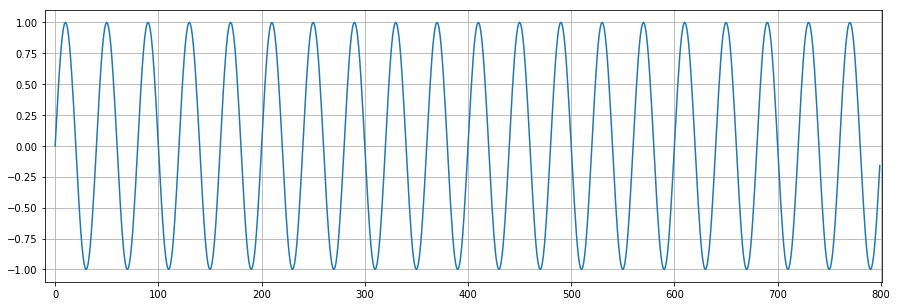

In [4]:
plt.figure(figsize=(15,5))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [5]:
test_size = 40
train_data = y[:-test_size]
test_data = y[-test_size:]

In [6]:
def input_data(seq,ws):
    L = len(seq)
    output = []
    for i in range(L-ws):
        data = seq[i:i+ws]
        pred = seq[i+ws:i+ws+1]
        output.append((data,pred))
    return output

In [7]:
train_set = input_data(train_data,40)

In [8]:
len(train_set)

720

In [9]:
train_set[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0901e-01,  4.5398e-01,  5.8777e-01,
          7.0709e-01,  8.0900e-01,  8.9099e-01,  9.5105e-01,  9.8768e-01,
          1.0000e+00,  9.8770e-01,  9.5107e-01,  8.9103e-01,  8.0906e-01,
          7.0716e-01,  5.8785e-01,  4.5406e-01,  3.0910e-01,  1.5652e-01,
          9.2657e-05, -1.5634e-01, -3.0892e-01, -4.5390e-01, -5.8770e-01,
         -7.0702e-01, -8.0895e-01, -8.9095e-01, -9.5102e-01, -9.8767e-01,
         -1.0000e+00, -9.8771e-01, -9.5110e-01, -8.9108e-01, -8.0911e-01,
         -7.0722e-01, -5.8792e-01, -4.5414e-01, -3.0918e-01, -1.5661e-01]),
 tensor([-0.0002]))

In [10]:
class LSTM(nn.Module):
    def __init__(self,input_size=1,hidden_size=50,out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size,hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [11]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [12]:
for params in model.parameters():
    print(params.numel())

200
10000
200
200
50
1


In [13]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

Epoch: 0      Loss:0.09168807417154312
Performance of test set: 0.6092309355735779


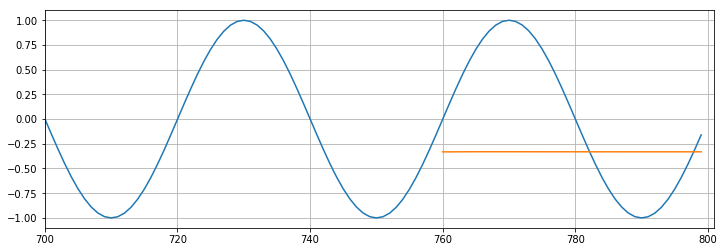

Epoch: 1      Loss:0.06483574211597443
Performance of test set: 0.5669296383857727


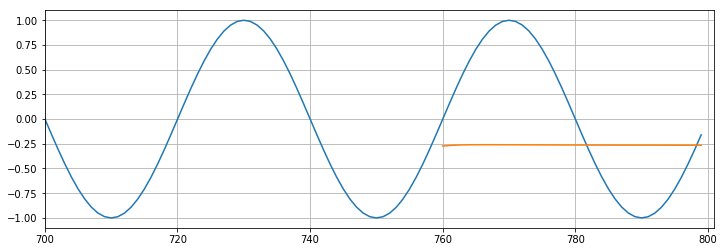

Epoch: 2      Loss:0.04186641797423363
Performance of test set: 0.5213672518730164


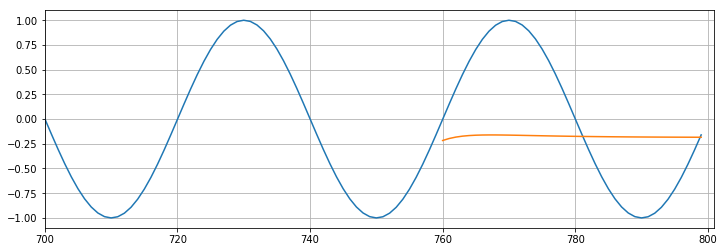

Epoch: 3      Loss:0.017827704548835754
Performance of test set: 0.42292481660842896


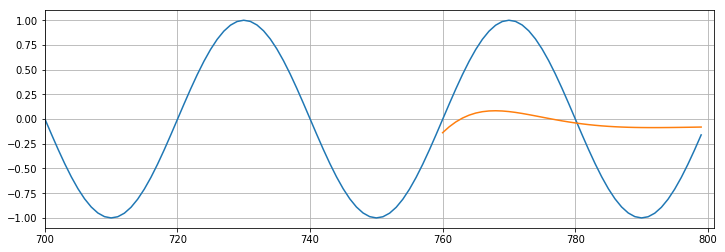

Epoch: 4      Loss:0.0029110941104590893
Performance of test set: 0.16621963679790497


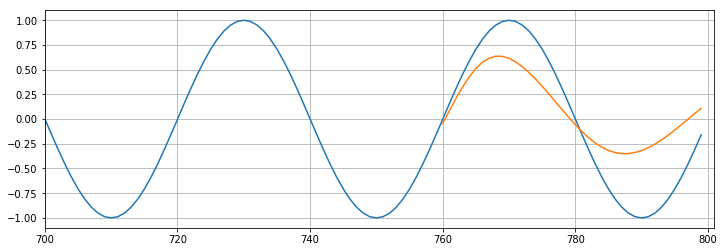

Epoch: 5      Loss:0.0003330060571897775
Performance of test set: 0.03047000616788864


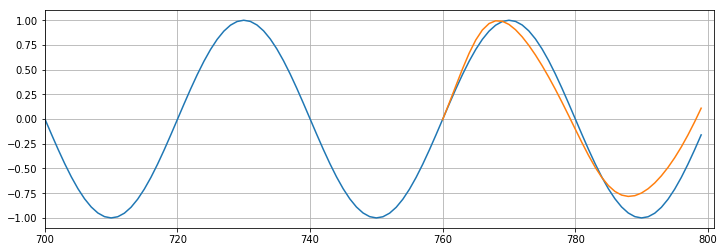

Epoch: 6      Loss:0.00013835499703418463
Performance of test set: 0.01495692040771246


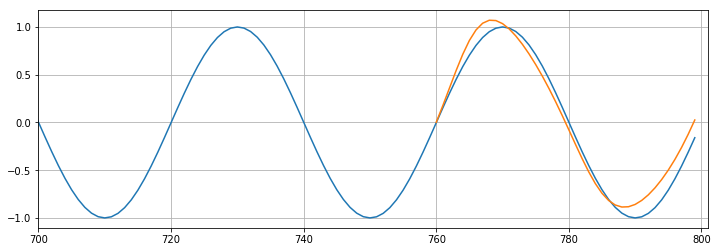

Epoch: 7      Loss:0.00012821314157918096
Performance of test set: 0.011830980889499187


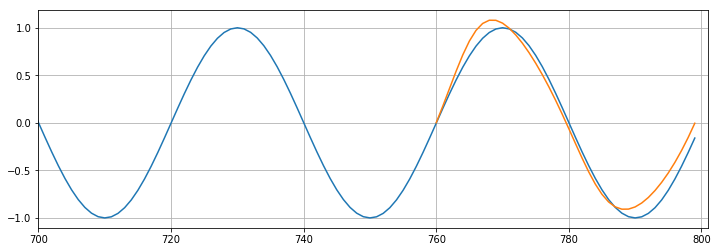

Epoch: 8      Loss:0.00013464926450978965
Performance of test set: 0.010140310041606426


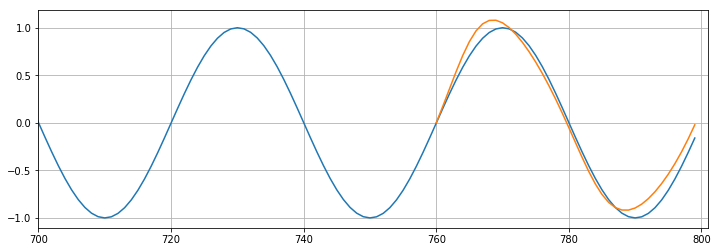

Epoch: 9      Loss:0.000139960233354941
Performance of test set: 0.008875299245119095


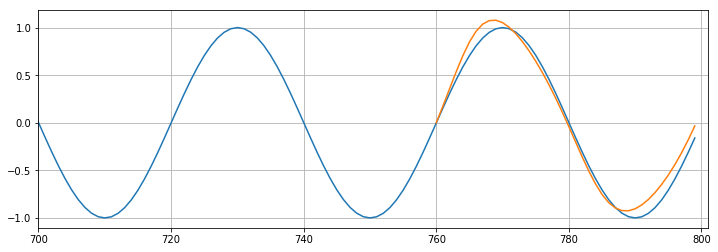

In [14]:
epochs = 10
future = 40
window_size = 40

for i in range(epochs):
    
    for seq,y_train in train_set:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_train,y_pred)
        
        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {i}      Loss:{loss.item()}")
    
    preds = train_data[-window_size:].tolist()
    
    for f in range(future):
        
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f"Performance of test set: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [15]:
all_data = input_data(y,40)
len(all_data)

760

In [16]:
import time
start = time.time()
epochs = 15
future = 40
window_size = 40

for i in range(epochs):
    
    for seq,y_train in all_data:
        
        optimizer.zero_grad()
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),(torch.zeros(1,1,model.hidden_size)))
        
        pred = model(seq)
        
        loss = criterion(y_train,pred)
        
        loss.backward()
        optimizer.step()
        
    print(f'Epochs: {i+1}      Loss: {loss.item()}')
            
end = time.time()
duration = end - start
print(f'Training completed in {duration} sec')

Epochs: 1      Loss: 0.00014301984629128128
Epochs: 2      Loss: 0.00014267576625570655
Epochs: 3      Loss: 0.00014028196164872497
Epochs: 4      Loss: 0.00013645736908074468
Epochs: 5      Loss: 0.0001316912821494043
Epochs: 6      Loss: 0.00012635513849090785
Epochs: 7      Loss: 0.00012071774108335376
Epochs: 8      Loss: 0.0001149858144344762
Epochs: 9      Loss: 0.00010929419659078121
Epochs: 10      Loss: 0.00010374187695560977
Epochs: 11      Loss: 9.839430276770145e-05
Epochs: 12      Loss: 9.328922169515863e-05
Epochs: 13      Loss: 8.844733383739367e-05
Epochs: 14      Loss: 8.387851994484663e-05
Epochs: 15      Loss: 7.958685455378145e-05
Training completed in 240.1041705608368 sec


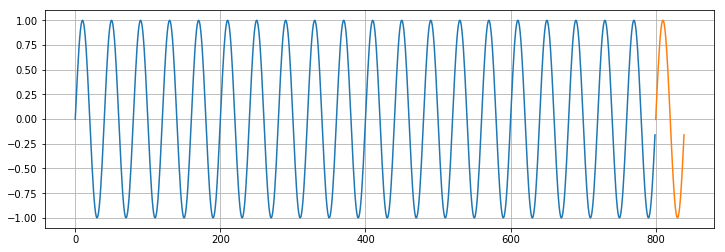

In [28]:
ip_forcast = y[-window_size:].tolist()
for f in range(future):
    seq = torch.FloatTensor(ip_forcast[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        pred = model(seq)
        ip_forcast.append(pred.item())

plt.figure(figsize=(12,4))
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+window_size),ip_forcast[:-window_size])
plt.show()